In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [8]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 10)

In [11]:
len(X_train)

120

In [12]:
len(X_test)

30

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X[['sepal_length']])
X['sepal_length'] = scaler.transform(X[['sepal_length']])

scaler.fit(X[['sepal_width']])
X['sepal_width'] = scaler.transform(X[['sepal_width']])

scaler.fit(X[['petal_length']])
X['petal_length'] = scaler.transform(X[['petal_length']])

scaler.fit(X[['petal_width']])
X['petal_width'] = scaler.transform(X[['petal_width']])

In [16]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train,y_train)

LogisticRegression()

In [20]:
model.score(X_test,y_test)

1.0

In [21]:
 y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

Text(33.0, 0.5, 'Truth')

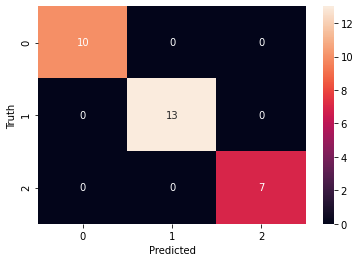

In [23]:
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')